**Импорт всех необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

<b><p>data.csv</p></b>
<ul>
<li>id: id транзакции </li>
<li>timestamp: дата продажи (транзакции) </li>
<li>full_sq: общая площадь  </li>
<li>life_sq: жилая площадь  </li>
<li>floor: этаж  </li>
<li>max_floor: количество этажей в здании </li>
<li>material: материал, из которого изговолены стены  </li>
<li>build_year: год строительства </li>
<li>num_room: количество жилых комнат </li>
<li>kitch_sq: площадь кухни </li>
<li>full_all: количество населения в регионе </li>
<li> state: жилищные условия </li>
<li>sub_area: название территории </li>
<li>price_doc: цена квартиры (целевая переменная) </li>
</ul>

<b><p>macro.csv</p></b>
<ul>
<li>timestamp : дата, на которую актуальны макроэкономические показатели </li>
<li>salary : средняя зарплата в регионе </li>
<li>fixed_basket: стоимость потребительской корзины </li>
<li>rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса </li>
<li>rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса </li>
<li>rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса </li>
<li>average_life_exp: средняя продолжительность жизни в регионе </li>
</ul>

## 1.2 Загрузка данных общее описание набора данных

In [2]:
PATH_base = "https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data.csv"
PATH_add = "https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data_macro.csv"
df = pd.read_csv(PATH_base)
macro =  pd.read_csv(PATH_add)

### 1.2.1 Базовый датасет

Вывести пример данных (первые строки и случайные строки)

In [3]:
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,7011550
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,6.0,78616,Severnoe Butovo,7100000
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6450000
5,8189,2013-05-28,63,NaN,17.0,1.0,17.0,4.0,2013.0,2.0,1.0,247469,Nekrasovka,5903808
6,8258,2013-05-30,74,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,12100000
7,8271,2013-05-31,93,93.0,3.0,1.0,1.0,1.0,2013.0,3.0,1.0,5740,Poselenie Pervomajskoe,5427640
8,8285,2013-06-01,51,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,7700000
9,8290,2013-06-03,77,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,11700000


In [4]:
df.sample(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
10979,22998,2014-09-27,101,62.0,10.0,4.0,14.0,4.0,2006.0,3.0,12.0,80791,Horoshevskoe,31500000
14468,27439,2015-01-22,32,19.0,7.0,3.0,9.0,1.0,1977.0,1.0,6.0,178264,Jasenevo,6500000
3632,14052,2014-01-23,57,32.0,3.0,3.0,17.0,1.0,1994.0,2.0,10.0,165727,Mar'ino,10000000
8163,19544,2014-06-10,55,30.0,2.0,NaN,4.0,2.0,1890.0,2.0,6.0,142243,Lefortovo,1200000
14837,27872,2015-02-12,49,34.0,3.0,3.0,9.0,1.0,1976.0,3.0,5.0,12327,Gol'janovo,8200000
11635,23838,2014-10-22,60,33.0,4.0,3.0,17.0,1.0,2008.0,2.0,11.0,102618,Juzhnoe Butovo,6950000
14775,27800,2015-02-09,52,34.0,8.0,3.0,9.0,1.0,1975.0,3.0,6.0,77878,Orehovo-Borisovo Severnoe,8100000
12292,24722,2014-11-13,35,14.0,5.0,3.0,16.0,1.0,2000.0,1.0,10.0,165727,Mar'ino,6000000
6884,17990,2014-04-29,40,25.0,2.0,3.0,5.0,2.0,1960.0,2.0,5.0,166803,Shhukino,8000000
14290,27207,2014-12-30,53,31.0,2.0,2.0,17.0,1.0,1985.0,2.0,8.0,67710,Krylatskoe,13100000


Размер набора данных

In [5]:
len(df)

18866

Описание типов данных по признакам

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          18866 non-null  int64  
 1   timestamp   18866 non-null  object 
 2   full_sq     18866 non-null  int64  
 3   life_sq     17291 non-null  float64
 4   floor       18838 non-null  float64
 5   state       15505 non-null  float64
 6   max_floor   17445 non-null  float64
 7   material    17445 non-null  float64
 8   build_year  16866 non-null  object 
 9   num_room    17445 non-null  float64
 10  kitch_sq    17445 non-null  float64
 11  full_all    18866 non-null  int64  
 12  sub_area    18866 non-null  object 
 13  price_doc   18866 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 2.0+ MB


Базовые статистики по признакам

In [7]:
df.describe(include='all')

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
count,18866.0000,18866,18866.0000,17291.0000,18838.0000,15505.0000,17445.0000,17445.0000,16866,17445.0000,17445.0000,1.8866e+04,18866,1.8866e+04
unique,NaN,1074,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,NaN,146,NaN
top,NaN,2014-12-16,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,NaN,Nekrasovka,NaN
freq,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN,919,NaN,NaN,NaN,620,NaN
mean,18799.7886,NaN,53.9409,34.2592,7.2937,2.2013,12.4233,1.8901,NaN,1.9348,7.2064,1.5972e+05,NaN,7.5824e+06
std,7082.4287,NaN,44.1162,59.9446,5.1912,0.8528,6.2798,1.5061,NaN,0.8642,26.9816,3.0435e+05,NaN,4.9838e+06
min,9.0000,NaN,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,NaN,0.0000,0.0000,2.5460e+03,NaN,1.0000e+05
25%,13513.2500,NaN,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,NaN,1.0000,5.0000,4.8439e+04,NaN,5.1000e+06
50%,19043.5000,NaN,49.0000,30.0000,6.0000,2.0000,12.0000,1.0000,NaN,2.0000,7.0000,8.7713e+04,NaN,6.6855e+06
75%,24748.7500,NaN,63.0000,43.0000,10.0000,3.0000,17.0000,2.0000,NaN,3.0000,9.0000,1.2535e+05,NaN,8.9000e+06


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

1. Данные о продажах собраны за ~3 года (1074 уникальных дат), больше всего сделок (133) было совершено 16 декабря 2014 года
2. Средняя площадь проданных квартир составила ~54 кв. м., вызывает подозрения максимальная общая площадь: она меньше максимальной жилой площади, что невозможно.
   Также, очевидно, что в данных есть пропуски, так как минимальная площадь равна 0.
   Учитывая вышесказанное, делать какие-либо выводы на основании серднего значения и стандартного отклонения площади нельзя, так как в статистике явно присутсвует шум
   Также, подозрительно, что все данные в столбце целые (тип данных стобца опеределился как int64)
3. Аналогичные замечания справедливы и для жилой площади.
   Дополнительно можно заметить, что по ~1500 сделок отсутсвует информация по жилой площади
4. Большинство проданных квартир находятся на 2-12 этажах (среднее 7 +/- ст. отклонение 5), хотя среднему значению и стандартному отклонению и тут доверять нельзя:
   Минимальный этаж равен 0, а максимальный этаж больше максимальной этажности здания, что снова указывает на наличие шума
   Не хватает информации об этаже по 28 сделкам
   Подозрительно, что в данных могут присутствовать нецелочисленные значения (тип данных столбца определился как float64)
5. Жилищные условия, по идее, представляют собой оценки от 1 до 5 (если судить по распределению по квартилям), однако максимальное значение равно 33, что, скорее всего, ошибка при заполнении.
   Скорее всего, существует справочник Балл-Описание, добавление которого повысит интерпретируемость информации
   Оценки могут быть нецелочисленными (тип данных столбца определился как float64)
   По ~3300 сделок информация отсутсвует
6. По этажности здания комментарии аналогичны комментариям по этажу.
   Пропущена информация по ~1500 сделок
   Подозрительно, что в данных могут присутствовать нецелочисленные значения (тип данных столбца определился как float64)
7. Данные по материалу выглядят как перечень ID материлов, нужен справочник ID-Название, чтобы повысить интерпретируемость информации
   Всего в статистике представлено 6 различных материлов, наиболее популярным является материал с ID 1: стены как минимум половины всех проданных квартир сделаны из него.
   Среднее значение 1.9 и 75-й перцентиль, равный 2, указывают на то, что вторым по популярности является материал с ID 2
   По ~1500 сделок нет информации по материалу
   Подозрительно, что в данных могут присутствовать нецелочисленные значения (тип данных столбца определился как float64)
8. В данных, скорее всего, представлены в основном новостройки (наиболее популярый год постройки 2014 с 919 продажами).
   Однако присутвуют и дома дореволюционного периода (120 уникальных годов постройки).
   Не хватает информации о годе постройки по ~2000 проданных квартир
   Тип данных столбца (object) указывает на наличие текстовых записей
9. В основном продавались двухкомнатные квартиры (среднее значение 1.9)
   Большинство квартир имело от 1 до 3 жилых комнат (среднее +/- стандартное отклонение, распределение по квартилям)
   Минимальное значение 0 и максимальное 19 вызывают подозрения о наличии шума и пропусков, но их, скорее всего, немного, так как остальная статистика выглядит правдоподобно
   В данных пропущено ~1500 записей о количестве комнат
   Подозрительно, что в данных могут присутствовать нецелочисленные значения (тип данных столбца определился как float64)
10. По площади кухни комментарии аналогичны остальным параметрам площади
    Максимальная площадь 2014 кв. м., возможно, является годом постройки, ошибочно занесенным в поле "Площадь кухни" при заполнении
    Информации не хвататет по ~1500 сделок
11. Население территорий в среднем составляет ~160 тыс. жителей
    Самая густонаселенная территория имеет ~1.7 млн жителей
    На территории с минимальным населением проживает всего ~2.5 тыс. жителей
    Население территорий распределено сильно неравномерно: среднее выше 75-го перцентиля, максимум почти в 11 раз больше среднего и почти в 14 больше 75-го перцентиля
12. Больше всего квартир (620) было продано на территории Nekrasovka, всего территорий в данных представлено 146
13. Средняя цена сделки составила ~7.5 млн рублей, большая часть сделок не превышала 9 млн рублей
    Самая дешевая квартира стоила 100 тыс. рублей, что больше похоже на стоимость кв. м., чем на стоимость квартиры (норматив стоимости метра от Минстроя на 2H22 составляет 83 тыс. руб.)
    Стоимость указана без копеек (тип данных стобца опеределился как int64)

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

Если не учитывать макроэкономические показатели и опираться исключительно на данные в рассматриваемой статистике, то полезными будут:
- Общая площадь (основной потребительский атрибут квартиры)
- Количество жилых комнат (характеризует "сценарий использования" квартиры - для студента/холостяка, для семьи с двумя детьми и проч.)
- Отношение жилой площади к количеству жилых комнат (характеризует качество квартиры, в паре с общей площадью позволяет косвенно учитывать площадь кухни, санузла и проч.)
- Отношение этажа к этажности здания (чем выше, тем дороже, но просто этажа не достаточно: 5 этаж в пятиэтажке и в 17-этажном здании будут стоить разных денег)
- Жилищные условия (зависит от используемых параметров оценки, скорее всего характеризует качество квартиры, здания и района)
- Территория (косвенно объединяет в себе все атрибуты территории: население, покупательная способность, объем спроса и предложения на рынке, без привязки к макроэкономическим показателям послужит прокси для них)

Убрать можно:
- Дату сделки (сама по себе никакой информации для предсказания не несет, может быть нужна только для связки с дополнительными данными)
- Материал стен (скорее всего отражен в жилищных условиях, так как влияет на шумоизоляцию и температуру в квартире)
- Год постройки (скорее всего отражен в жилищных условиях, так как влияет на степень износа и общедомовую инфраструктуру: лифт, мусоропровод и проч.)
- Площадь кухни (зависит от обшщей и жилой площади, не добавит значимой информации для предсказания)
- Население территории (является одним из атрибутов территории, без привязки к макроэкономическим показателям по ней дополнительной информации для предсказания не несет)
  (при попытке использования придется предсказывать численность населения территории, чтобы от нее предсказать уже стоимость квартиры, а если принять показатель статичным, то для предсказания хватит самого названия территории)

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [8]:
df.isna().sum() / len(df) * 100

id             0.0000
timestamp      0.0000
full_sq        0.0000
life_sq        8.3484
floor          0.1484
state         17.8151
max_floor      7.5321
material       7.5321
build_year    10.6011
num_room       7.5321
kitch_sq       7.5321
full_all       0.0000
sub_area       0.0000
price_doc      0.0000
dtype: float64

Есть ли аномальные данные в стллбцах? Если да, то укажите на них и объясните, почему считаете аномальными

Описано в текстовых выводах

### 1.2.2 Макро показатели

Вывести пример данных (первые строки и случайные строки)

In [9]:
macro.head(15)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,38410.5,11443.63,NaN,NaN,NaN,74.2
1,2010-01-02,38410.5,11443.63,NaN,NaN,NaN,74.2
2,2010-01-03,38410.5,11443.63,NaN,NaN,NaN,74.2
3,2010-01-04,38410.5,11443.63,NaN,NaN,NaN,74.2
4,2010-01-05,38410.5,11443.63,NaN,NaN,NaN,74.2
5,2010-01-06,38410.5,11443.63,NaN,NaN,NaN,74.2
6,2010-01-07,38410.5,11443.63,NaN,NaN,NaN,74.2
7,2010-01-08,38410.5,11443.63,NaN,NaN,NaN,74.2
8,2010-01-09,38410.5,11443.63,NaN,NaN,NaN,74.2
9,2010-01-10,38410.5,11443.63,NaN,NaN,NaN,74.2


In [10]:
macro.sample(15)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
925,2012-07-14,48830.4,13762.47,43.42,38.25,31.10,75.74
926,2012-07-15,48830.4,13762.47,43.42,38.25,31.10,75.74
313,2010-11-10,38410.5,12094.33,42.07,35.20,28.88,74.20
2165,2015-12-06,64310.0,19274.42,49.42,40.09,30.37,76.77
365,2011-01-01,44898.7,12728.09,41.76,34.71,28.14,75.79
387,2011-01-23,44898.7,12728.09,41.76,34.71,28.14,75.79
497,2011-05-13,44898.7,13068.42,43.71,35.89,27.94,75.79
2434,2016-08-31,NaN,20380.73,46.40,38.04,29.68,NaN
598,2011-08-22,44898.7,12838.36,41.80,36.77,29.07,75.79
980,2012-09-07,48830.4,13726.03,47.30,40.66,32.90,75.74


Размер набора данных

In [11]:
len(macro)

2484

Описание типов данных по признакам

In [12]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


Базовые статистики по признакам

In [13]:
macro.describe(include='all')

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2484,2191.0000,2484.0000,2211.0000,2211.0000,2211.0000,2191.0000
unique,2484,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52188.9331,15331.4980,47.2997,38.8954,31.0024,75.9282
std,NaN,9068.5590,2789.1363,3.0702,5.0352,3.9841,0.8699
min,NaN,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
25%,NaN,44898.7000,12992.4400,45.5300,37.9300,29.7800,75.7400
50%,NaN,48830.4000,14983.9200,47.3500,39.4700,31.1100,75.7900
75%,NaN,61208.0000,18295.0700,49.3500,41.3000,33.0600,76.7000


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

1. В статистике представлены данные за ~7 лет (2484 уникальных даты)
2. Средняя зарплата в регионе за описываемый период составила ~52 тыс. руб. с разбросом от ~38 тыс. руб. до ~64 тыс. руб.
   Подозрительных / аномальных значений в базовой статистике нет
   Не хвататет данных по ~300 наблюдениям
3. Средняя стоимость потребительской корзины составила ~15 тыс. руб. с разбросом от ~11.5 тыс. руб. до ~20.5 тыс. руб.
   Подозрительных / аномальных значений в базовой статистике нет
4. Средняя стоимость аренды 3-х комнатной квартиры составила ~47 тыс. руб. с разбросом от ~37 тыс. руб. до ~53 тыс. руб.
   Подозрительных / аномальных значений в базовой статистике нет
   Пропущено ~1200 записей
5. Средняя стоимость аренды 2-х комнатной квартиры составила ~39 тыс. руб. с разбросом от 100 руб. до ~44 тыс. руб.
   Минимальная стоимость в 100 рублей явно указывает на наличие шума в данных, но его, скорее всего, немного, так как среднее значение укладывается в общую логику удорожания стоимости аренды:
   Средняя стоимость 2-х комнатной на ~25% выше средней стоимости однокомнатной, средняя стоимость 3-х комнатной на ~22% выше средней стоимости 2-х комнатной
   Пропущено ~1200 записей
6. Средняя стоимость аренды однокомнатной квартиры составила ~31 тыс. руб. с разбросом от ~2.3 тыс. руб. до ~35 тыс. руб.
   Минимальная стоимость арнеды вызывает подозрения, так как в Москве минимальная стоимость аренды квартиры не может быть ниже 15 тыс. руб
   Пропущено ~1200 записей
7. Средняя продолжительность жизни составила ~76 лет с разбросом от ~74 лет до ~77 лет
   Подозрительных / аномальных значений в базовой статистике нет
   Пропущено ~300 записей

Количество пропусков указывает на наличие двух дополнительных источников, данные из которых притягивались к информации о стоимости потребительской корзины:
- Динамика зарплат и средней продожительности жизни
- Динамика стоимости аренды квартир

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

Полезные признаки:
- Разница зарплаты и стоимости корзины (характеризует количество "свободных" денег у среднего жителя на оплату ипотечного платежа)
  (С другой стороны, учитывая, что данные представлены не по территориям, может оказаться бесполезным, так как абсолютная "платежеспособность" территории будет определяться ее населением, а относительная будет для всех территорий одинаковой)
- Стоимости аренды квартиры (характеризует стоимость альтернативы покупки квартиры и, как следствие, средний размер ипотечного платежа => средняя рыночная стоимость квартиры, если принять
  условия ипотеки константой)

Можно убрать:
- Дату (сама по себе никакой информации для предсказания не несет, может быть нужна только для связки с дополнительными данными)
- Продолжительность жизни (с натяжкой можно предположить, что чем выше продолжительность жизни, тем больше одобрят ипотечных кредитов, но:
  1) Подавляющее большинство покупателей квартир моложе чем [продолжительность жизни - срок ипотеки]
  2) Сама по себе вероятность одобрения очень косвенно влияет на цену квартиры)

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [14]:
macro.isna().sum() / len(df) * 100

timestamp               0.0000
salary                  1.5531
fixed_basket            0.0000
rent_price_3room_eco    1.4470
rent_price_2room_eco    1.4470
rent_price_1room_eco    1.4470
average_life_exp        1.5531
dtype: float64

Есть ли аномальные данные в стллбцах? Если да, то укажите на них и объясните, почему считаете аномальными

Описано в текстовых выводах

## 1.3 Замените все ранее найденные ошибочные данные на None. Заполните все пропуски в данных: которые были и которые появились. Используйте как стратегии изученные на занятии, так и логику, которая вытекает из самих данных

### 1.3.1 Главный набор данных

In [15]:
# Сохраним изначальный датафрейм
df_init = df.copy()
df.describe(include="all")

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
count,18866.0000,18866,18866.0000,17291.0000,18838.0000,15505.0000,17445.0000,17445.0000,16866,17445.0000,17445.0000,1.8866e+04,18866,1.8866e+04
unique,NaN,1074,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,NaN,146,NaN
top,NaN,2014-12-16,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,NaN,Nekrasovka,NaN
freq,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN,919,NaN,NaN,NaN,620,NaN
mean,18799.7886,NaN,53.9409,34.2592,7.2937,2.2013,12.4233,1.8901,NaN,1.9348,7.2064,1.5972e+05,NaN,7.5824e+06
std,7082.4287,NaN,44.1162,59.9446,5.1912,0.8528,6.2798,1.5061,NaN,0.8642,26.9816,3.0435e+05,NaN,4.9838e+06
min,9.0000,NaN,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,NaN,0.0000,0.0000,2.5460e+03,NaN,1.0000e+05
25%,13513.2500,NaN,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,NaN,1.0000,5.0000,4.8439e+04,NaN,5.1000e+06
50%,19043.5000,NaN,49.0000,30.0000,6.0000,2.0000,12.0000,1.0000,NaN,2.0000,7.0000,8.7713e+04,NaN,6.6855e+06
75%,24748.7500,NaN,63.0000,43.0000,10.0000,3.0000,17.0000,2.0000,NaN,3.0000,9.0000,1.2535e+05,NaN,8.9000e+06


Для выявления аномальных значений примем следующие логические и нормативные пердпосылки:
1) Общая площадь не может быть меньше суммы жилой площади и площади кухни
2) Площадь кухни не может быть меньше 5 кв. м. для однокомнатных квартир и 8 кв. м. для квартир с двумя и более комнатами (СП 54.13330.2016) (кухня-столовая в лофтах может быть 6 кв. м., за неимением такого признака этим ограничением предлагается пренебречь)
3) Площадь жилой комнаты (опираясь на данные, будем считать, что площади комнат равны) не может быть меньше 14 кв. м. для однокомнатных квартир и 8 кв. м. для остальных (СП 54.13330.2016), жилая площадь не может превышать 2 500 кв. м. (так как не удалось найти информации по максимальной площади жилой комнаты, опираемся на общую площадь: самая большая квартира в Москве - 2.18 тыс. кв. м. в Башне Федерация в Москва-Сити, построенной позже исследуемых данных)
4) Площадь кухни не может быть четырехзначной
5) Общая площадь квартиры не может превышать 2 500 кв. м. (Самая большая квартира в Москве - 2.18 тыс. кв. м. в Башне Федерация в Москва-Сити, построенной позже исследуемых данных)
6) Этаж квартиры не может быть больше этажности здания, не может быть меньше 1 и должен быть целочисленным
7) Жилищные условия представляют собой шкалу оценок от 1 до 5 (должны быть целочисленными и не превышать 5)
8) Максимальная этажность здания составляет 95 этажей (Башня Восток в Москва-Сити), не может быть меньше 1 и должна быть целочисленной
9) Материалы представляют собой ID материалов стен в диапазоне от 1 до 6 (должны быть целочисленными и не превышать 6)
10) Год постройки должен быть четырехзначным, целочисленным и не превышать максимальную дату сделки
11) Количество комнат должно быть целочисленным, не может быть меньше 1 и больше 20 (самая многокомнатная квартира в Москве)
12) Стоимость квартиры не может быть меньше 1.5 млн руб. (в 2022 году самая дешевая квартира стоила 1.6 млн, в 2014 - ~4 млн)
13) Стоимость квадратного метра не может быть меньше 200 тыс. руб (Южное Бутово - 205 тыс)

!NB: В данных наблюдаются и более сложные аномалии, если рассматривать строку целиком, а не отдельно по каждому параметру (половина строки правдоподобна, а вторая - нет), но для целей упражнения предлагается остановиться на описанных 13 предпосылках и не углубляться

In [16]:
# Добавим дополнительные поля для проверки соблюдения предпосылок: Площадь комнаты, Стоимость метра и Рассчетную общую площадь
df['room_sq'] = np.where(df['num_room'] != 0, df['life_sq'] / df['num_room'], np.nan)
df['sq_price'] = np.where(df['full_sq'] != 0, df['price_doc'] / df['full_sq'], np.nan)
df['full_sq_calc'] = df['life_sq'] + df['kitch_sq']

In [17]:
# В данных о годе постройки есть текстовое значение, которое не позволяет провести проверку на соотвествие предпосылке (10)
# Поэтому заменим его на NaN отдельно
df.loc[pd.to_numeric(df['build_year'],errors='coerce').isna(), 'build_year'] = np.nan
df['build_year'] = pd.to_numeric(df['build_year'])

In [18]:
# Преобразуем дату в целевой тип
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [19]:
df.describe(include="all")

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc
count,18866.0000,18866,18866.0000,17291.0000,18838.0000,15505.0000,17445.0000,17445.0000,1.6865e+04,17445.0000,17445.0000,1.8866e+04,18866,1.8866e+04,16173.0000,1.8864e+04,16180.0000
unique,NaN,1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN,NaN,NaN,NaN
top,NaN,2014-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nekrasovka,NaN,NaN,NaN,NaN
freq,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620,NaN,NaN,NaN,NaN
first,NaN,2011-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,18799.7886,NaN,53.9409,34.2592,7.2937,2.2013,12.4233,1.8901,3.0682e+03,1.9348,7.2064,1.5972e+05,NaN,7.5824e+06,18.5226,1.5115e+05,41.8616
std,7082.4287,NaN,44.1162,59.9446,5.1912,0.8528,6.2798,1.5061,1.5439e+05,0.8642,26.9816,3.0435e+05,NaN,4.9838e+06,21.7995,3.2664e+05,67.8427
min,9.0000,NaN,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000e+00,0.0000,0.0000,2.5460e+03,NaN,1.0000e+05,0.0000,1.2897e+03,0.0000
25%,13513.2500,NaN,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1.9670e+03,1.0000,5.0000,4.8439e+04,NaN,5.1000e+06,14.3333,1.0486e+05,28.0000


In [20]:
# Последовательно заменим все аномальные значения на NaN 
df.loc[df['full_sq'] < df['full_sq_calc'], 'full_sq'] = np.nan # (1)
df.loc[((df['kitch_sq'] < 5) & (df['num_room'] == 1)) | ((df['kitch_sq'] < 8) & (df['num_room'] > 1)) | (df['kitch_sq'] > 999) | (df['kitch_sq'] < 5), 'kitch_sq'] = np.nan # (2 и 4)
df.loc[((df['room_sq'] < 14) & (df['num_room'] == 1)) | ((df['room_sq'] < 8) & (df['num_room'] > 1)) | (df['life_sq'] > 2500) | (df['life_sq'] == 0), 'life_sq'] = np.nan # (3)
df.loc[(df['full_sq'] > 2500) | (df['full_sq'] == 0), 'full_sq'] = np.nan # (5)
df.loc[(df['floor'] > df['max_floor']) | (df['floor'] < 1) | (~df['floor'].apply(float.is_integer)), 'floor'] = np.nan # (6)
df.loc[(df['state'] > 5) | (~df['state'].apply(float.is_integer)), 'state'] = np.nan # (7)
df.loc[(df['max_floor'] > 95) | (df['max_floor'] < 1) | (~df['max_floor'].apply(float.is_integer)), 'max_floor'] = np.nan # (8)
df.loc[(df['material'] > 6) | (~df['material'].apply(float.is_integer)), 'material'] = np.nan # (9)
df.loc[(df['build_year'] < 1000) | (df['build_year'] > df['timestamp'].dt.year.max()) | (~df['build_year'].apply(float.is_integer)), 'build_year'] = np.nan # (10)
df.loc[(df['num_room'] > 20) | (df['num_room'] < 1) | (~df['num_room'].apply(float.is_integer)), 'num_room'] = np.nan # (11)
df.loc[(df['price_doc'] < 1500000) | (df['sq_price'] < 200000), 'price_doc'] = np.nan # (12 и 13)

In [21]:
df.describe(include="all")

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc
count,18866.0000,18866,17318.0000,16801.0000,18092.0000,15504.0000,17266.0000,17445.0000,15431.0000,17435.0000,10005.0000,1.8866e+04,18866,2.2070e+03,16173.0000,1.8864e+04,16180.0000
unique,NaN,1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN,NaN,NaN,NaN
top,NaN,2014-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nekrasovka,NaN,NaN,NaN,NaN
freq,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620,NaN,NaN,NaN,NaN
first,NaN,2011-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,18799.7886,NaN,53.3532,34.6766,7.2135,2.1993,12.5521,1.8901,1984.2888,1.9359,9.2702,1.5972e+05,NaN,1.3874e+07,18.5226,1.5115e+05,41.8616
std,7082.4287,NaN,20.9618,19.3215,5.1099,0.8162,6.1829,1.5061,20.5415,0.8632,7.7231,3.0435e+05,NaN,9.1199e+06,21.7995,3.2664e+05,67.8427
min,9.0000,NaN,5.0000,8.0000,1.0000,1.0000,1.0000,1.0000,1691.0000,1.0000,5.0000,2.5460e+03,NaN,2.5900e+06,0.0000,1.2897e+03,0.0000
25%,13513.2500,NaN,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1968.0000,1.0000,8.0000,4.8439e+04,NaN,8.1500e+06,14.3333,1.0486e+05,28.0000


Для каждого поля стратегия заполнения NaN будет отличаться, заполнение одного поля будет влиять на заполнение последующих:

In [22]:
# Начнем с количества комнат, так как от этого будут "плясать" следующие заполнения.
# Количество комнат заполним самым популярным значением в выборке (правильнее было бы поставить это в зависимость от общей площади, но там еще больше пропусков)
mod_rooms = df['num_room'].mode()[0]
df['num_room'].fillna(mod_rooms, inplace=True)

In [23]:
# Для площади кухни возьмем наиболее распространенную площадь (моду) для каждой "комнатности"
kitch_mode = df.groupby(['num_room'], as_index=False)['kitch_sq'].agg(pd.Series.mode)
kitch_mode['k_mode'] = kitch_mode['kitch_sq'].str[0]
kitch_mode['k_mode'].fillna(kitch_mode['kitch_sq'], inplace=True)
kitch_mode

,num_room,kitch_sq,k_mode
0,1.0,8.0,8.0
1,2.0,8.0,8.0
2,3.0,10.0,10.0
3,4.0,10.0,10.0
4,5.0,10.0,10.0
5,6.0,"[11.0, 16.0, 19.0]",11.0
6,7.0,9.0,9.0
7,8.0,"[13.0, 14.0, 17.0]",13.0
8,9.0,17.0,17.0
9,10.0,10.0,10.0


In [24]:
# Для 19 комнат поставим наиболее распространенную площадь кухни
kitch_mode.loc[kitch_mode['num_room'] == 19, 'k_mode'] = kitch_mode['k_mode'].mode()[0] 
kitch_mode

,num_room,kitch_sq,k_mode
0,1.0,8.0,8.0
1,2.0,8.0,8.0
2,3.0,10.0,10.0
3,4.0,10.0,10.0
4,5.0,10.0,10.0
5,6.0,"[11.0, 16.0, 19.0]",11.0
6,7.0,9.0,9.0
7,8.0,"[13.0, 14.0, 17.0]",13.0
8,9.0,17.0,17.0
9,10.0,10.0,10.0


In [25]:
# Притянем информацию по моде площади кухни в основной датафрейм, заменим пустоты и удалим лишние столбцы
df = df.merge(kitch_mode, how='left', on='num_room', suffixes=('','_km'))
df['kitch_sq'].fillna(df['k_mode'], inplace=True)
df.drop(columns=['kitch_sq_km', 'k_mode'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc
0,8059,2013-05-21,NaN,NaN,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000.0,11.0000,250000.0000,23.0
1,8138,2013-05-25,53.0,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,NaN,15.0000,169811.3208,38.0
2,8156,2013-05-27,77.0,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,NaN,13.6667,91059.0909,53.0
3,8157,2013-05-27,45.0,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,NaN,13.5000,157777.7778,33.0
4,8178,2013-05-28,38.0,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,NaN,20.0000,169736.8421,28.0
5,8189,2013-05-28,63.0,NaN,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,NaN,NaN,93711.2381,NaN
6,8258,2013-05-30,74.0,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,NaN,15.3333,163513.5135,55.0
7,8271,2013-05-31,NaN,93.0,NaN,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,NaN,31.0000,58361.7204,94.0
8,8285,2013-06-01,51.0,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,NaN,15.0000,150980.3922,39.0
9,8290,2013-06-03,77.0,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,NaN,16.6667,151948.0519,58.0


In [26]:
# Для жилой площади рассчитаем среднюю площадь комнаты для каждой "комнатности" (с учетом оговорки в пердпосылках про неправдоподобность некоторых записей)
life_mode = df.groupby(['num_room'], as_index=False)['room_sq'].agg(pd.Series.mode)
life_mode['l_mode'] = life_mode['room_sq'].str[0]
life_mode['l_mode'].fillna(life_mode['room_sq'], inplace=True)
life_mode

,num_room,room_sq,l_mode
0,1.0,19.0,19.0000
1,2.0,15.0,15.0000
2,3.0,14.6667,14.6667
3,4.0,11.5,11.5000
4,5.0,13.4,13.4000
5,6.0,"[6.166666666666667, 11.333333333333334, 13.833...",6.1667
6,7.0,15.5714,15.5714
7,8.0,"[14.375, 14.875, 17.375]",14.3750
8,9.0,16.0,16.0000
9,10.0,"[3.3, 3.4]",3.3000


In [27]:
# Притянем информацию по моде площади комнаты в основной датафрейм, заменим пустоты и удалим лишние столбцы
df = df.merge(life_mode, how='left', on='num_room', suffixes=('','_lm'))
df['life_sq'].fillna(df['l_mode'] * df['num_room'], inplace=True)
df.drop(columns=['room_sq_lm', 'l_mode'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc
0,8059,2013-05-21,NaN,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000.0,11.0000,250000.0000,23.0
1,8138,2013-05-25,53.0,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,NaN,15.0000,169811.3208,38.0
2,8156,2013-05-27,77.0,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,NaN,13.6667,91059.0909,53.0
3,8157,2013-05-27,45.0,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,NaN,13.5000,157777.7778,33.0
4,8178,2013-05-28,38.0,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,NaN,20.0000,169736.8421,28.0
5,8189,2013-05-28,63.0,30.0,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,NaN,NaN,93711.2381,NaN
6,8258,2013-05-30,74.0,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,NaN,15.3333,163513.5135,55.0
7,8271,2013-05-31,NaN,93.0,NaN,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,NaN,31.0000,58361.7204,94.0
8,8285,2013-06-01,51.0,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,NaN,15.0000,150980.3922,39.0
9,8290,2013-06-03,77.0,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,NaN,16.6667,151948.0519,58.0


In [28]:
# Общую площадь посчитаем через наиболее популярное отношение общей площади к полезной (жилая + кухня) для каждой "комнатности"
df['full_to_usefull'] = df['full_sq'] / (df['life_sq'] + df['kitch_sq'])
full_mode = df.groupby(['num_room'], as_index=False)['full_to_usefull'].agg(pd.Series.mode)
full_mode['f_mode'] = full_mode['full_to_usefull'].str[0]
full_mode['f_mode'].fillna(full_mode['full_to_usefull'], inplace=True)
full_mode

,num_room,full_to_usefull,f_mode
0,1.0,1.3333,1.3333
1,2.0,1.2222,1.2222
2,3.0,1.3818,1.3818
3,4.0,1.1429,1.1429
4,5.0,"[0.9754098360655737, 1.5064935064935066]",0.9754
5,6.0,"[1.1645569620253164, 1.1657458563535912, 1.187...",1.1646
6,7.0,1.2288,1.2288
7,8.0,"[1.230263157894737, 1.2325581395348837, 1.3014...",1.2303
8,9.0,1.3665,1.3665
9,10.0,"[1.3488372093023255, 1.372093023255814]",1.3488


In [29]:
# Для 5 комнат первая мода нарушает предпосылку (1), поэтому заменим ее на второе значение
full_mode.loc[full_mode['num_room'] == 5, 'f_mode'] = full_mode['full_to_usefull'].str[1]
full_mode

,num_room,full_to_usefull,f_mode
0,1.0,1.3333,1.3333
1,2.0,1.2222,1.2222
2,3.0,1.3818,1.3818
3,4.0,1.1429,1.1429
4,5.0,"[0.9754098360655737, 1.5064935064935066]",1.5065
5,6.0,"[1.1645569620253164, 1.1657458563535912, 1.187...",1.1646
6,7.0,1.2288,1.2288
7,8.0,"[1.230263157894737, 1.2325581395348837, 1.3014...",1.2303
8,9.0,1.3665,1.3665
9,10.0,"[1.3488372093023255, 1.372093023255814]",1.3488


In [30]:
# Притянем информацию по моде соотношения площадей в основной датафрейм, заменим пустоты и удалим лишние столбцы
df = df.merge(full_mode, how='left', on='num_room', suffixes=('','_fm'))
df['full_sq'].fillna(df['f_mode'] * (df['life_sq'] + df['kitch_sq']), inplace=True)
df.drop(columns=['full_to_usefull_fm', 'f_mode'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc,full_to_usefull
0,8059,2013-05-21,41.3333,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000.0,11.0000,250000.0000,23.0,NaN
1,8138,2013-05-25,53.0000,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,NaN,15.0000,169811.3208,38.0,1.3947
2,8156,2013-05-27,77.0000,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,NaN,13.6667,91059.0909,53.0,1.4528
3,8157,2013-05-27,45.0000,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,NaN,13.5000,157777.7778,33.0,1.2857
4,8178,2013-05-28,38.0000,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,NaN,20.0000,169736.8421,28.0,1.3571
5,8189,2013-05-28,63.0000,30.0,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,NaN,NaN,93711.2381,NaN,1.6579
6,8258,2013-05-30,74.0000,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,NaN,15.3333,163513.5135,55.0,1.3455
7,8271,2013-05-31,142.3273,93.0,NaN,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,NaN,31.0000,58361.7204,94.0,NaN
8,8285,2013-06-01,51.0000,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,NaN,15.0000,150980.3922,39.0,1.3077
9,8290,2013-06-03,77.0000,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,NaN,16.6667,151948.0519,58.0,1.3276


In [31]:
# Цену посчитаем через среднюю стоимость квадратного метра в территории
sq_avg = df.groupby(['sub_area'], as_index=False)['sq_price'].mean()
df = df.merge(sq_avg, how='left', on='sub_area', suffixes=('','_sq'))
df['price_doc'].fillna(df['full_sq'] * df['sq_price_sq'], inplace=True)
df.drop(columns=['sq_price_sq'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc,full_to_usefull
0,8059,2013-05-21,41.3333,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2.7500e+06,11.0000,250000.0000,23.0,NaN
1,8138,2013-05-25,53.0000,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,7.2374e+06,15.0000,169811.3208,38.0,1.3947
2,8156,2013-05-27,77.0000,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,1.2715e+07,13.6667,91059.0909,53.0,1.4528
3,8157,2013-05-27,45.0000,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,6.6343e+06,13.5000,157777.7778,33.0,1.2857
4,8178,2013-05-28,38.0000,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6.5786e+06,20.0000,169736.8421,28.0,1.3571
5,8189,2013-05-28,63.0000,30.0,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,8.4432e+06,NaN,93711.2381,NaN,1.6579
6,8258,2013-05-30,74.0000,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,1.0140e+07,15.3333,163513.5135,55.0,1.3455
7,8271,2013-05-31,142.3273,93.0,NaN,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,9.5540e+06,31.0000,58361.7204,94.0,NaN
8,8285,2013-06-01,51.0000,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,5.8774e+06,15.0000,150980.3922,39.0,1.3077
9,8290,2013-06-03,77.0000,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,1.4249e+07,16.6667,151948.0519,58.0,1.3276


In [32]:
# Этажность зданий определим как наиболее популярную в районе
mfloor_mode = df.groupby(['sub_area'], as_index=False)['max_floor'].agg(pd.Series.mode)
mfloor_mode['mf_mode'] = mfloor_mode['max_floor'].str[0]
mfloor_mode['mf_mode'].fillna(mfloor_mode['max_floor'], inplace=True)
mfloor_mode.head(15)

,sub_area,max_floor,mf_mode
0,Ajeroport,5.0,5.0
1,Akademicheskoe,5.0,5.0
2,Alekseevskoe,9.0,9.0
3,Altuf'evskoe,12.0,12.0
4,Arbat,"[5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 12.0, 14.0]",5.0
5,Babushkinskoe,12.0,12.0
6,Basmannoe,12.0,12.0
7,Begovoe,9.0,9.0
8,Beskudnikovskoe,17.0,17.0
9,Bibirevo,12.0,12.0


In [33]:
# Притянем информацию по моде этажности в основной датафрейм, заменим пустоты и удалим лишние столбцы
df = df.merge(mfloor_mode, how='left', on='sub_area', suffixes=('','_mf'))
df['max_floor'].fillna(df['mf_mode'], inplace=True)
df.drop(columns=['max_floor_mf', 'mf_mode'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc,full_to_usefull
0,8059,2013-05-21,41.3333,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2.7500e+06,11.0000,250000.0000,23.0,NaN
1,8138,2013-05-25,53.0000,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,7.2374e+06,15.0000,169811.3208,38.0,1.3947
2,8156,2013-05-27,77.0000,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,1.2715e+07,13.6667,91059.0909,53.0,1.4528
3,8157,2013-05-27,45.0000,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,6.6343e+06,13.5000,157777.7778,33.0,1.2857
4,8178,2013-05-28,38.0000,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6.5786e+06,20.0000,169736.8421,28.0,1.3571
5,8189,2013-05-28,63.0000,30.0,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,8.4432e+06,NaN,93711.2381,NaN,1.6579
6,8258,2013-05-30,74.0000,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,1.0140e+07,15.3333,163513.5135,55.0,1.3455
7,8271,2013-05-31,142.3273,93.0,NaN,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,9.5540e+06,31.0000,58361.7204,94.0,NaN
8,8285,2013-06-01,51.0000,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,5.8774e+06,15.0000,150980.3922,39.0,1.3077
9,8290,2013-06-03,77.0000,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,1.4249e+07,16.6667,151948.0519,58.0,1.3276


In [34]:
# Этаж здания посчитаем как наиболее популярный этаж для каждой этажности
floor_mode =  df.groupby(['max_floor'], as_index=False)['floor'].agg(pd.Series.mode)
floor_mode['f_mode'] = floor_mode['floor'].str[0]
floor_mode['f_mode'].fillna(floor_mode['floor'], inplace=True)
floor_mode.head(15)

,max_floor,floor,f_mode
0,1.0,1.0,1.0
1,2.0,2.0,2.0
2,3.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,6.0,6.0
6,7.0,7.0,7.0
7,8.0,"[2.0, 8.0]",2.0
8,9.0,5.0,5.0
9,10.0,10.0,10.0


In [35]:
# Притянем информацию по моде этажа в основной датафрейм, заменим пустоты и удалим лишние столбцы
df = df.merge(floor_mode, how='left', on='max_floor', suffixes=('','_f'))
df['floor'].fillna(df['f_mode'], inplace=True)
df.drop(columns=['floor_f', 'f_mode'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc,full_to_usefull
0,8059,2013-05-21,41.3333,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2.7500e+06,11.0000,250000.0000,23.0,NaN
1,8138,2013-05-25,53.0000,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,7.2374e+06,15.0000,169811.3208,38.0,1.3947
2,8156,2013-05-27,77.0000,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,1.2715e+07,13.6667,91059.0909,53.0,1.4528
3,8157,2013-05-27,45.0000,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,6.6343e+06,13.5000,157777.7778,33.0,1.2857
4,8178,2013-05-28,38.0000,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6.5786e+06,20.0000,169736.8421,28.0,1.3571
5,8189,2013-05-28,63.0000,30.0,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,8.4432e+06,NaN,93711.2381,NaN,1.6579
6,8258,2013-05-30,74.0000,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,1.0140e+07,15.3333,163513.5135,55.0,1.3455
7,8271,2013-05-31,142.3273,93.0,1.0,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,9.5540e+06,31.0000,58361.7204,94.0,NaN
8,8285,2013-06-01,51.0000,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,5.8774e+06,15.0000,150980.3922,39.0,1.3077
9,8290,2013-06-03,77.0000,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,1.4249e+07,16.6667,151948.0519,58.0,1.3276


In [36]:
# Жилищные условия посчитаем как моду для каждого района (хотел добавить еще год постройки, но для некоторых годов нет информации по жилищным условиям)
st_mode = df.groupby(['sub_area'], as_index=False)['state'].agg(pd.Series.mode)
st_mode['s_mode'] = st_mode['state'].str[0]
st_mode['s_mode'].fillna(st_mode['state'], inplace=True)
st_mode

,sub_area,state,s_mode
0,Ajeroport,2.0,2.0
1,Akademicheskoe,3.0,3.0
2,Alekseevskoe,2.0,2.0
3,Altuf'evskoe,2.0,2.0
4,Arbat,3.0,3.0
...,...,...,...
141,Vyhino-Zhulebino,2.0,2.0
142,Zamoskvorech'e,3.0,3.0
143,Zapadnoe Degunino,1.0,1.0
144,Zjablikovo,2.0,2.0


In [37]:
# Для Poselenie Klenovskoe поставим наиболее популярные жилищные условия
st_mode.loc[st_mode['sub_area'] == 'Poselenie Klenovskoe', 's_mode'] = st_mode['s_mode'].mode()[0]

In [38]:
# Притянем информацию по моде жилищных условий в основной датафрейм, заменим пустоты и удалим лишние столбцы
df = df.merge(st_mode, how='left', on='sub_area', suffixes=('','_st'))
df['state'].fillna(df['s_mode'], inplace=True)
df.drop(columns=['state_st', 's_mode'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc,full_to_usefull
0,8059,2013-05-21,41.3333,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2.7500e+06,11.0000,250000.0000,23.0,NaN
1,8138,2013-05-25,53.0000,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,7.2374e+06,15.0000,169811.3208,38.0,1.3947
2,8156,2013-05-27,77.0000,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,1.2715e+07,13.6667,91059.0909,53.0,1.4528
3,8157,2013-05-27,45.0000,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,6.6343e+06,13.5000,157777.7778,33.0,1.2857
4,8178,2013-05-28,38.0000,20.0,15.0,1.0,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6.5786e+06,20.0000,169736.8421,28.0,1.3571
5,8189,2013-05-28,63.0000,30.0,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,8.4432e+06,NaN,93711.2381,NaN,1.6579
6,8258,2013-05-30,74.0000,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,1.0140e+07,15.3333,163513.5135,55.0,1.3455
7,8271,2013-05-31,142.3273,93.0,1.0,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,9.5540e+06,31.0000,58361.7204,94.0,NaN
8,8285,2013-06-01,51.0000,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,5.8774e+06,15.0000,150980.3922,39.0,1.3077
9,8290,2013-06-03,77.0000,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,1.4249e+07,16.6667,151948.0519,58.0,1.3276


In [39]:
# Год постройки определим как наиболее популярный для каждого района (если квартиру купили в этом районе, то, скорее всего, дом будет определенного года постройки)
y_mode = df.groupby(['sub_area'], as_index=False)['build_year'].agg(pd.Series.mode)
y_mode['y_mode'] = y_mode['build_year'].str[0]
y_mode['y_mode'].fillna(y_mode['build_year'], inplace=True)
y_mode

,sub_area,build_year,y_mode
0,Ajeroport,1960.0,1960.0
1,Akademicheskoe,2012.0,2012.0
2,Alekseevskoe,1965.0,1965.0
3,Altuf'evskoe,1969.0,1969.0
4,Arbat,"[1900.0, 1929.0, 1954.0, 1958.0, 1963.0, 1964....",1900.0
...,...,...,...
141,Vyhino-Zhulebino,"[1968.0, 1995.0]",1968.0
142,Zamoskvorech'e,1961.0,1961.0
143,Zapadnoe Degunino,2014.0,2014.0
144,Zjablikovo,1976.0,1976.0


In [40]:
# Притянем информацию по моде года постройки в основной датафрейм, заменим пустоты и удалим лишние столбцы
df = df.merge(y_mode, how='left', on='sub_area', suffixes=('','_y'))
df['build_year'].fillna(df['y_mode'], inplace=True)
df.drop(columns=['build_year_y', 'y_mode'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc,full_to_usefull
0,8059,2013-05-21,41.3333,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2.7500e+06,11.0000,250000.0000,23.0,NaN
1,8138,2013-05-25,53.0000,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,7.2374e+06,15.0000,169811.3208,38.0,1.3947
2,8156,2013-05-27,77.0000,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,1.2715e+07,13.6667,91059.0909,53.0,1.4528
3,8157,2013-05-27,45.0000,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,6.6343e+06,13.5000,157777.7778,33.0,1.2857
4,8178,2013-05-28,38.0000,20.0,15.0,1.0,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6.5786e+06,20.0000,169736.8421,28.0,1.3571
5,8189,2013-05-28,63.0000,30.0,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,8.4432e+06,NaN,93711.2381,NaN,1.6579
6,8258,2013-05-30,74.0000,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,1.0140e+07,15.3333,163513.5135,55.0,1.3455
7,8271,2013-05-31,142.3273,93.0,1.0,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,9.5540e+06,31.0000,58361.7204,94.0,NaN
8,8285,2013-06-01,51.0000,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,5.8774e+06,15.0000,150980.3922,39.0,1.3077
9,8290,2013-06-03,77.0000,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,1.4249e+07,16.6667,151948.0519,58.0,1.3276


In [41]:
# Материал стен определим как моду для каждого года постройки (в разные года строили из разных материалов)
m_mode = df.groupby(['build_year'], as_index=False)['material'].agg(pd.Series.mode)
m_mode['m_mode'] = m_mode['material'].str[0]
m_mode['m_mode'].fillna(m_mode['material'], inplace=True)
m_mode.head(15)

,build_year,material,m_mode
0,1691.0,5.0,5.0
1,1860.0,"[1.0, 2.0]",1.0
2,1876.0,2.0,2.0
3,1886.0,2.0,2.0
4,1890.0,2.0,2.0
5,1895.0,2.0,2.0
6,1896.0,2.0,2.0
7,1900.0,2.0,2.0
8,1904.0,2.0,2.0
9,1905.0,2.0,2.0


In [42]:
# Притянем информацию по моде материалов в основной датафрейм, заменим пустоты и удалим лишние столбцы
df = df.merge(m_mode, how='left', on='build_year', suffixes=('','_m'))
df['material'].fillna(df['m_mode'], inplace=True)
df.drop(columns=['material_m', 'm_mode'], inplace=True)
df.head(15)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,room_sq,sq_price,full_sq_calc,full_to_usefull
0,8059,2013-05-21,41.3333,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2.7500e+06,11.0000,250000.0000,23.0,NaN
1,8138,2013-05-25,53.0000,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,7.2374e+06,15.0000,169811.3208,38.0,1.3947
2,8156,2013-05-27,77.0000,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,1.2715e+07,13.6667,91059.0909,53.0,1.4528
3,8157,2013-05-27,45.0000,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,8.0,78616,Severnoe Butovo,6.6343e+06,13.5000,157777.7778,33.0,1.2857
4,8178,2013-05-28,38.0000,20.0,15.0,1.0,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6.5786e+06,20.0000,169736.8421,28.0,1.3571
5,8189,2013-05-28,63.0000,30.0,17.0,1.0,17.0,4.0,2013.0,2.0,8.0,247469,Nekrasovka,8.4432e+06,NaN,93711.2381,NaN,1.6579
6,8258,2013-05-30,74.0000,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,1.0140e+07,15.3333,163513.5135,55.0,1.3455
7,8271,2013-05-31,142.3273,93.0,1.0,1.0,1.0,1.0,2013.0,3.0,10.0,5740,Poselenie Pervomajskoe,9.5540e+06,31.0000,58361.7204,94.0,NaN
8,8285,2013-06-01,51.0000,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,5.8774e+06,15.0000,150980.3922,39.0,1.3077
9,8290,2013-06-03,77.0000,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,1.4249e+07,16.6667,151948.0519,58.0,1.3276


In [43]:
# Удалим вспомогательные столбцы
df.drop(columns=['room_sq', 'sq_price', 'full_sq_calc', 'full_to_usefull'], inplace=True)
df.describe(include='all')

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\1495372413.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
count,18866.0000,18866,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,1.8866e+04,18866,1.8866e+04
unique,NaN,1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN
top,NaN,2014-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nekrasovka,NaN
freq,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620,NaN
first,NaN,2011-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,18799.7886,NaN,56.3255,33.9543,6.9989,2.1304,12.4787,1.8358,1987.2304,1.9408,8.8824,1.5972e+05,NaN,8.7982e+06
std,7082.4287,NaN,26.6376,18.5792,5.1404,0.8228,6.1504,1.4643,21.4128,0.8300,5.6679,3.0435e+05,NaN,5.6396e+06
min,9.0000,NaN,5.0000,8.0000,1.0000,1.0000,1.0000,1.0000,1691.0000,1.0000,5.0000,2.5460e+03,NaN,1.0000e+06
25%,13513.2500,NaN,39.0000,20.0000,3.0000,1.0000,9.0000,1.0000,1969.0000,1.0000,8.0000,4.8439e+04,NaN,5.5824e+06


### 1.3.2 Набор с макропоказателями

In [46]:
macro_init = macro.copy()
macro.describe(include='all')

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2484,2191.0000,2484.0000,2211.0000,2211.0000,2211.0000,2191.0000
unique,2484,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52188.9331,15331.4980,47.2997,38.8954,31.0024,75.9282
std,NaN,9068.5590,2789.1363,3.0702,5.0352,3.9841,0.8699
min,NaN,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
25%,NaN,44898.7000,12992.4400,45.5300,37.9300,29.7800,75.7400
50%,NaN,48830.4000,14983.9200,47.3500,39.4700,31.1100,75.7900
75%,NaN,61208.0000,18295.0700,49.3500,41.3000,33.0600,76.7000


Для выявления аномалий в данных примем следующие предпосылки:
1) Стоимость аренды однокомнатной квартиры не может быть меньше 25 тыс. руб (https://www.incom.ru/novosti-i-analitika/novosti-kompanii/srednyaya-stoimost-arendy-kvartir-v-dekabre-2014-goda/)
2) Стоимость арнеды двухкомнтной квартиры не может быть меньше 30 тыс. руб (https://www.incom.ru/novosti-i-analitika/novosti-kompanii/srednyaya-stoimost-arendy-kvartir-v-dekabre-2014-goda/)

К остальным данным вопросов нет

In [47]:
# Заменим аномальные значения на NaN
macro.loc[macro['rent_price_1room_eco'] < 25, 'rent_price_1room_eco'] = np.nan
macro.loc[macro['rent_price_2room_eco'] < 30, 'rent_price_2room_eco'] = np.nan

In [48]:
# Преобразуем дату в целевой тип
macro['timestamp'] = pd.to_datetime(macro['timestamp'])

In [49]:
# Данные по зраплате и продолжительности жизни заполним линейной интерполяцией
macro = macro.sort_values(by='timestamp', ascending=True)
macro['salary'].interpolate(method='linear', inplace=True)
macro['average_life_exp'].interpolate(method='linear', inplace=True)

In [50]:
macro.describe(include='all')

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\1928403926.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  macro.describe(include='all')


,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2484,2484.0000,2484.0000,2211.0000,2183.0000,2180.0000,2484.0000
unique,2484,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,53618.6725,15331.4980,47.2997,39.3930,31.4105,76.0275
std,NaN,9371.5718,2789.1363,3.0702,2.4733,2.0544,0.8610
min,NaN,38410.5000,11443.6300,37.5400,33.3800,27.5800,74.2000
25%,NaN,44898.7000,12992.4400,45.5300,37.9300,29.7800,75.7400


In [51]:
# Стоимость арнеды для каждого типа квартиры посчитаем через среднее отношение стоимости аренды к "свободным деньгам" (разница между зарплатой и стоимостью корзины)
macro['free_money'] = macro['salary'] - macro['fixed_basket']
ratio_3r = macro['rent_price_3room_eco'].sum() / macro['free_money'].sum()
ratio_2r = macro['rent_price_2room_eco'].sum() / macro['free_money'].sum()
ratio_1r = macro['rent_price_1room_eco'].sum() / macro['free_money'].sum()
macro['rent_price_1room_eco'].fillna(macro['free_money'] * ratio_1r, inplace=True)
macro['rent_price_2room_eco'].fillna(macro['free_money'] * ratio_2r, inplace=True)
macro['rent_price_3room_eco'].fillna(macro['free_money'] * ratio_3r, inplace=True)
macro.describe(include='all')

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\816759453.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  macro.describe(include='all')


,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,free_money
count,2484,2484.0000,2484.0000,2484.0000,2484.0000,2484.0000,2484.0000,2484.0000
unique,2484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,53618.6725,15331.4980,45.3326,37.6956,30.0460,76.0275,38287.1745
std,NaN,9371.5718,2789.1363,6.3043,5.2923,4.2617,0.8610,6821.8475
min,NaN,38410.5000,11443.6300,29.1293,23.9528,19.0728,74.2000,26184.6900
25%,NaN,44898.7000,12992.4400,44.2500,36.9600,29.0700,75.7400,32041.7300


!NB: Минимальные цифры все равно не соотносятся с бенчмарком, но выглядят уже правдоподобнее. В целом, можно повторить процедуру n раз до тех пор, пока минимальные значения не превысят заявленные лимиты

In [52]:
# Удалим вспомогательные столбцы
macro.drop(columns=['free_money'], inplace=True)

## 1.4 Обогатите основной набор данных данными из макропоказателей и поместите в переменную `df_full`

In [53]:
df_full = df.merge(macro, how='left', on='timestamp')
df_full.describe(include='all')

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\520136052.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_full.describe(include='all')


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,18866.0000,18866,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,1.8866e+04,18866,1.8866e+04,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000
unique,NaN,1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nekrasovka,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,18799.7886,NaN,56.3255,33.9543,6.9989,2.1304,12.4787,1.8358,1987.2304,1.9408,8.8824,1.5972e+05,NaN,8.7982e+06,59882.2021,16214.1458,49.8407,41.7690,33.4921,76.5993
std,7082.4287,NaN,26.6376,18.5792,5.1404,0.8228,6.1504,1.4643,21.4128,0.8300,5.6679,3.0435e+05,NaN,5.6396e+06,3718.2141,1163.5793,1.8440,1.2342,1.1937,0.2299
min,9.0000,NaN,5.0000,8.0000,1.0000,1.0000,1.0000,1.0000,1691.0000,1.0000,5.0000,2.5460e+03,NaN,1.0000e+06,44898.7000,12856.9700,43.4200,37.1698,29.1605,75.7400
25%,13513.2500,NaN,39.0000,20.0000,3.0000,1.0000,9.0000,1.0000,1969.0000,1.0000,8.0000,4.8439e+04,NaN,5.5824e+06,55485.2000,15417.3400,48.7000,41.1700,32.9600,76.3700


## 1.5 Проверьте данные на наличие выбросов. По каждому столбцу. Напишите своё мнение: нужно ли в каждой из ситуаций обрабатывать выбросы, или можно оставить. Если нужно обработать, то примените один из изученных подходов, либо предложите свой

In [54]:
def search_outliers(feature):
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lbound = q1 - iqr*1.5
    ubound = q3 + iqr*1.5
    return np.where((feature < lbound) | (feature > ubound))[0]

### 1.5.1 Главный набор данных

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18866 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          18866 non-null  int64         
 1   timestamp   18866 non-null  datetime64[ns]
 2   full_sq     18866 non-null  float64       
 3   life_sq     18866 non-null  float64       
 4   floor       18866 non-null  float64       
 5   state       18866 non-null  float64       
 6   max_floor   18866 non-null  float64       
 7   material    18866 non-null  float64       
 8   build_year  18866 non-null  float64       
 9   num_room    18866 non-null  float64       
 10  kitch_sq    18866 non-null  float64       
 11  full_all    18866 non-null  int64         
 12  sub_area    18866 non-null  object        
 13  price_doc   18866 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 2.2+ MB


In [56]:
for feature in df.columns:
    if df[feature].dtypes == 'O' or df[feature].dtypes == '<M8[ns]':
        print(f"Признак {feature} не может содержать выбросов")
    else:
        count_outliers = len(search_outliers(df[feature]))
        print(f"Признак {feature} содержит {count_outliers} ({round((count_outliers / df[feature].shape[0]) * 100,2)}%) выбросов")

Признак id содержит 0 (0.0%) выбросов
Признак timestamp не может содержать выбросов
Признак full_sq содержит 765 (4.05%) выбросов
Признак life_sq содержит 493 (2.61%) выбросов
Признак floor содержит 362 (1.92%) выбросов
Признак state содержит 0 (0.0%) выбросов
Признак max_floor содержит 117 (0.62%) выбросов
Признак material содержит 3271 (17.34%) выбросов
Признак build_year содержит 17 (0.09%) выбросов
Признак num_room содержит 444 (2.35%) выбросов
Признак kitch_sq содержит 418 (2.22%) выбросов
Признак full_all содержит 1631 (8.65%) выбросов
Признак sub_area не может содержать выбросов
Признак price_doc содержит 1032 (5.47%) выбросов


Потребность обрабатывать выбросы отсутствует, так как при обработке аномалий мы уже их "сгладили".
На всякий случай проставим флаг выброса напротив выявленных выбросов

In [57]:
for feature in df.columns:
    if df[feature].dtypes == 'O' or df[feature].dtypes == '<M8[ns]':
        print(f"Признаку {feature} не был добавлен флаг выброса") # сделал так, потому что условие != отказывалось работать =(
    else:
        outliers = search_outliers(df[feature])
        if len(outliers) > 0:
            df[f'{feature}_out'] = 0
            df.loc[outliers,f'{feature}_out'] = 1

Признаку timestamp не был добавлен флаг выброса
Признаку sub_area не был добавлен флаг выброса


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18866 entries, 0 to 18865
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              18866 non-null  int64         
 1   timestamp       18866 non-null  datetime64[ns]
 2   full_sq         18866 non-null  float64       
 3   life_sq         18866 non-null  float64       
 4   floor           18866 non-null  float64       
 5   state           18866 non-null  float64       
 6   max_floor       18866 non-null  float64       
 7   material        18866 non-null  float64       
 8   build_year      18866 non-null  float64       
 9   num_room        18866 non-null  float64       
 10  kitch_sq        18866 non-null  float64       
 11  full_all        18866 non-null  int64         
 12  sub_area        18866 non-null  object        
 13  price_doc       18866 non-null  float64       
 14  full_sq_out     18866 non-null  int64         
 15  li

### 1.5.2 Набор с макропоказателями

In [59]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             2484 non-null   datetime64[ns]
 1   salary                2484 non-null   float64       
 2   fixed_basket          2484 non-null   float64       
 3   rent_price_3room_eco  2484 non-null   float64       
 4   rent_price_2room_eco  2484 non-null   float64       
 5   rent_price_1room_eco  2484 non-null   float64       
 6   average_life_exp      2484 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 155.2 KB


In [60]:
for feature in macro.columns:
    if macro[feature].dtypes == 'O' or macro[feature].dtypes == '<M8[ns]':
        print(f"Признак {feature} не может содержать выбросов")
    else:
        count_outliers = len(search_outliers(macro[feature]))
        print(f"Признак {feature} содержит {count_outliers} ({round((count_outliers / macro[feature].shape[0]) * 100,2)}%) выбросов")

Признак timestamp не может содержать выбросов
Признак salary содержит 0 (0.0%) выбросов
Признак fixed_basket содержит 0 (0.0%) выбросов
Признак rent_price_3room_eco содержит 273 (10.99%) выбросов
Признак rent_price_2room_eco содержит 273 (10.99%) выбросов
Признак rent_price_1room_eco содержит 273 (10.99%) выбросов
Признак average_life_exp содержит 0 (0.0%) выбросов


Потребность обрабатывать выбросы отсутствует, так как при обработке аномалий мы уже их "сгладили".
На всякий случай проставим флаг выброса напротив выявленных выбросов

In [61]:
for feature in macro.columns:
    if macro[feature].dtypes == 'O' or macro[feature].dtypes == '<M8[ns]':
        print(f"Признаку {feature} не был добавлен флаг выброса") # сделал так, потому что условие != отказывалось работать =(
    else:
        outliers = search_outliers(macro[feature])
        if len(outliers) > 0:
            macro[f'{feature}_out'] = 0
            macro.loc[outliers,f'{feature}_out'] = 1

Признаку timestamp не был добавлен флаг выброса


In [62]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2483
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 2484 non-null   datetime64[ns]
 1   salary                    2484 non-null   float64       
 2   fixed_basket              2484 non-null   float64       
 3   rent_price_3room_eco      2484 non-null   float64       
 4   rent_price_2room_eco      2484 non-null   float64       
 5   rent_price_1room_eco      2484 non-null   float64       
 6   average_life_exp          2484 non-null   float64       
 7   rent_price_3room_eco_out  2484 non-null   int64         
 8   rent_price_2room_eco_out  2484 non-null   int64         
 9   rent_price_1room_eco_out  2484 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 278.0 KB


## 1.6 Создайте не менее 5 новых признаков на основе существующих данных. Опишите текстом обоснование создания каждой. Признаки должны привносить некую новую информацию для понимания цены квартиры

In [63]:
df_full.describe(include='all')

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\3951975486.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_full.describe(include='all')


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,18866.0000,18866,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,1.8866e+04,18866,1.8866e+04,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000
unique,NaN,1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nekrasovka,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,18799.7886,NaN,56.3255,33.9543,6.9989,2.1304,12.4787,1.8358,1987.2304,1.9408,8.8824,1.5972e+05,NaN,8.7982e+06,59882.2021,16214.1458,49.8407,41.7690,33.4921,76.5993
std,7082.4287,NaN,26.6376,18.5792,5.1404,0.8228,6.1504,1.4643,21.4128,0.8300,5.6679,3.0435e+05,NaN,5.6396e+06,3718.2141,1163.5793,1.8440,1.2342,1.1937,0.2299
min,9.0000,NaN,5.0000,8.0000,1.0000,1.0000,1.0000,1.0000,1691.0000,1.0000,5.0000,2.5460e+03,NaN,1.0000e+06,44898.7000,12856.9700,43.4200,37.1698,29.1605,75.7400
25%,13513.2500,NaN,39.0000,20.0000,3.0000,1.0000,9.0000,1.0000,1969.0000,1.0000,8.0000,4.8439e+04,NaN,5.5824e+06,55485.2000,15417.3400,48.7000,41.1700,32.9600,76.3700


Добваляемые признаки:
1) Отношение этажа к этажности здания - чем выше квартира, тем она дороже
2) Отношение жилой площади к количеству комнат - чем больше комнаты, тем квартира дороже
3) Доля "свободных" денег в зарплате - чем больше "свободных" денег у населения, тем выше спрос на квартиры, тем они дороже
4) Стоимость аренды за кв. м. по "комнатности" квартир - чем дороже аренда, тем выше спрос на ипотеку, то есть, тем выше цена на квартиры
5) Доля полезной площади - чем выше доля, тем дешевле, так как в дорогих квартирах бывает несколько санузлов, балконы бОльшей площади и проч. (под "неполезной" площадью подразумеваются санузлы, коридоры, балконы/лоджии и проч)

!NB: Специально избегал показателей, основанных на цене (напр., сравнение стоимости покупки метра vs стоимость аренды метра), так как ее мы и пытаемся предсказать

In [64]:
df_full['floor_to_max'] = df_full['floor'] / df_full['max_floor']
df_full['room_sq'] = df_full['life_sq'] / df_full['num_room']
df_full['free_money'] = 1 - df_full['fixed_basket'] / df_full['salary']
df_full['sq_rent_1r'] = np.where(df_full['num_room'] == 1, df_full['rent_price_1room_eco'] / df_full['full_sq'], np.nan)
df_full['sq_rent_2r'] = np.where(df_full['num_room'] == 2, df_full['rent_price_2room_eco'] / df_full['full_sq'], np.nan)
df_full['sq_rent_3r'] = np.where(df_full['num_room'] == 3, df_full['rent_price_3room_eco'] / df_full['full_sq'], np.nan)
df_full['usefull_sq'] = (df_full['life_sq'] + df_full['kitch_sq']) / df_full['full_sq']

## 1.7 Провести визуальный анализ всех признаков

Ко всем графикам писать выводы текстом. Что вы видите, почему построили именно такую диаграмму

### 1.7.1 Анализ признаков по отдельности (где нужно делать группировки, преобразования категориальных типов данных к числовым, смотреть в разрезе других категориальных признаков)

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\1649018980.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_full.groupby(['material'])['sq_price','price_doc'].mean().plot(kind='bar', secondary_y=['sq_price'])


<AxesSubplot: xlabel='material'>

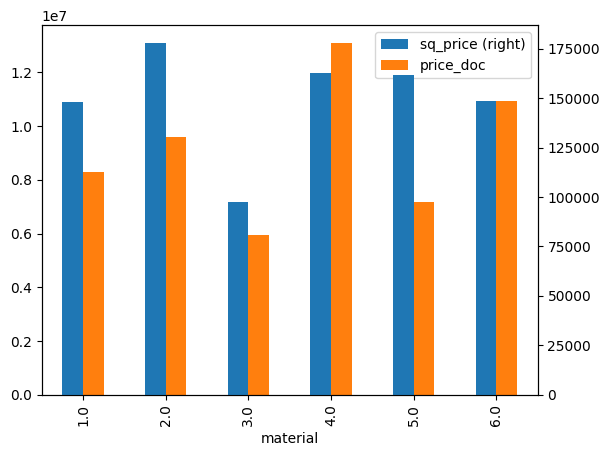

In [65]:
# Сравним стоимость квартиры и квадратного метра в зависимости от материала
df_full['sq_price'] = df_full['price_doc'] / df_full['full_sq']  
df_full.groupby(['material'])['sq_price','price_doc'].mean().plot(kind='bar', secondary_y=['sq_price'])
# Самый дорогой метр получился у квартир из материала 2, самые дорогоие квартиры из материала 4 (видимо, из 4 сторятся квартиры бОльшей площади)

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\3408823941.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_full.groupby(['state'])['sq_price','price_doc'].mean().plot(kind='bar', secondary_y=['sq_price'])


<AxesSubplot: xlabel='state'>

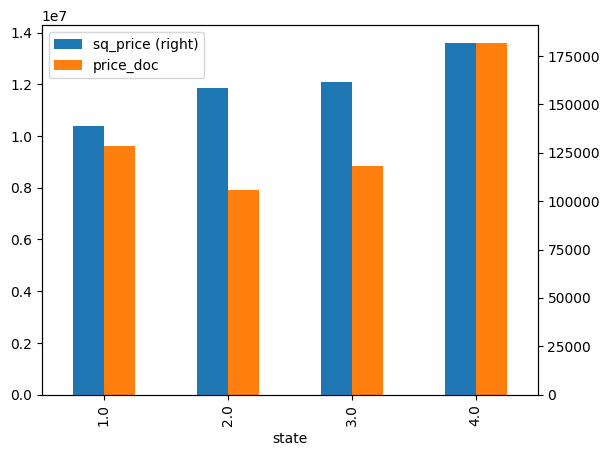

In [66]:
# Проведем аналогичный анализ для жилищных условий
df_full.groupby(['state'])['sq_price','price_doc'].mean().plot(kind='bar', secondary_y=['sq_price'])
# Жилищыне условия напрямую влияют на стоимость квадратного метра, а вот стоимость уже зависит от количества этих метров

In [67]:
# Найдем районы с самым дорогим квадратным метром
data = df_full.groupby(['sub_area'], as_index=False)['sq_price'].mean()
fig = px.treemap(data_frame=data,path=['sub_area'],values='sq_price',height=500,width=1000)
fig.show()
# Самый дорогой квадратный метр в районе Левобережное, на втором месте - Арбат

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\3465721398.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



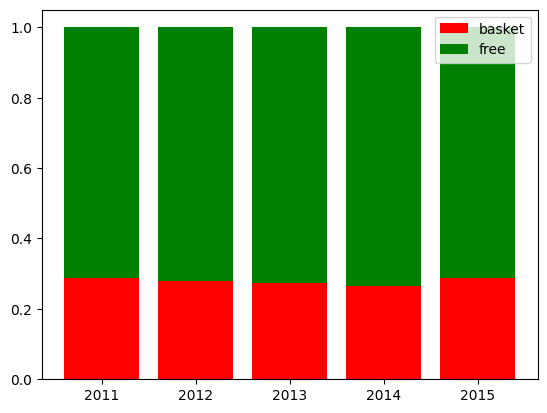

In [74]:
# Проанализируем объем "свободных" денег у населения по годам
df_full['year'] = df_full['timestamp'].dt.year
dt = df_full.groupby(['year'], as_index=False)['salary','fixed_basket'].sum()
dt['free_money'] = dt['salary'] - dt['fixed_basket']
plt.bar(dt['year'], (dt['fixed_basket'] / dt['salary']), color='r', label='basket')
plt.bar(dt['year'], (dt['free_money'] / dt['salary']),bottom=(dt['fixed_basket'] / dt['salary']), color='g', label='free')
plt.legend()
plt.show()
# Доля свободных денег не изменялась по годам, маловероятно она является значимым фактором для предсказания цены

C:\Users\dmikh\AppData\Local\Temp\ipykernel_22500\1453487773.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot: >

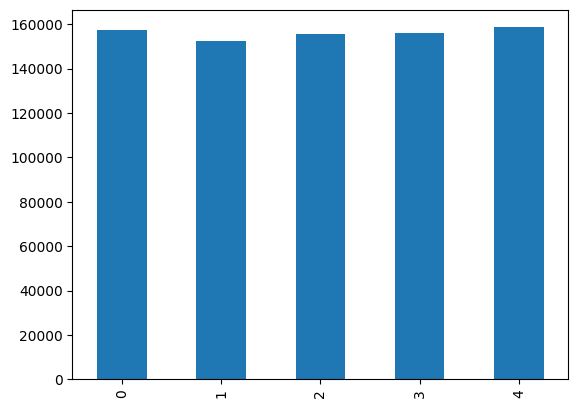

In [80]:
# Оценим динамику стомости квадратного метра по годам
dt = df_full.groupby(['year'], as_index=False)['full_sq','price_doc'].sum()
dt['sq_price'] = dt['price_doc'] / dt['full_sq']
dt['sq_price'].plot(kind='bar')
# Средняя цена квадратного метра менялась по годам

### 1.7.2 Анализ совместного влияния признаков и их влияния на целевой признак

In [81]:
df_full.head(5)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,...,average_life_exp,floor_to_max,room_sq,free_money,sq_rent_1r,sq_rent_2r,sq_rent_3r,usefull_sq,sq_price,year
0,8059,2013-05-21,41.3333,19.0,2.0,3.0,5.0,2.0,1907.0,1.0,...,76.37,0.4000,19.0000,0.7299,0.7055,NaN,NaN,0.7500,66532.2581,2013
1,8138,2013-05-25,53.0000,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,...,76.37,0.6250,15.0000,0.7299,NaN,0.7692,NaN,0.7170,136553.9503,2013
2,8156,2013-05-27,77.0000,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,...,76.37,0.1176,13.6667,0.7299,NaN,NaN,0.6149,0.6883,165124.8542,2013
3,8157,2013-05-27,45.0000,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,...,76.37,0.6667,13.5000,0.7299,NaN,0.9060,NaN,0.7778,147428.6297,2013
4,8178,2013-05-28,38.0000,20.0,15.0,1.0,16.0,1.0,1982.0,1.0,...,76.37,0.9375,20.0000,0.7299,0.7674,NaN,NaN,0.7368,173121.3765,2013


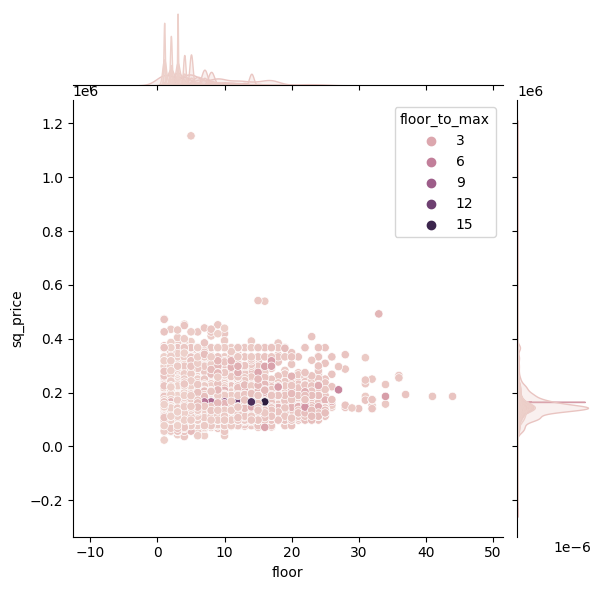

In [84]:
sns.jointplot(x="floor", y="sq_price", data=df_full, hue="floor_to_max")
# Никакой значимой зависимости между стоимостью метра и этажом или отношением этажа к этажности не обнаружено

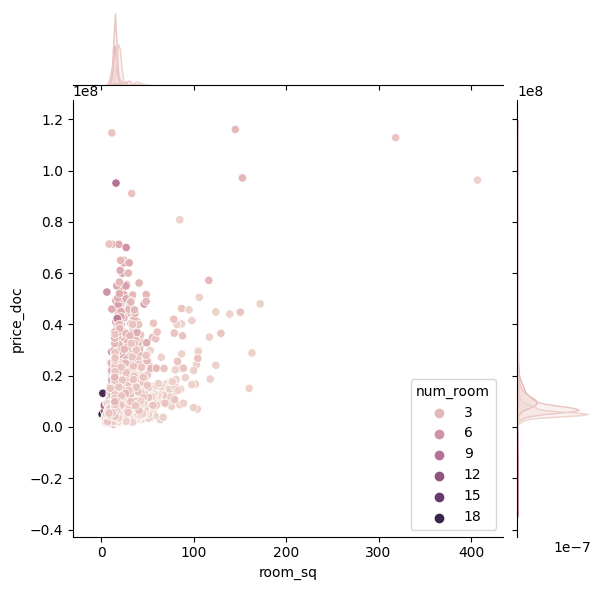

In [87]:
sns.jointplot(x="room_sq", y="price_doc", data=df_full, hue="num_room")
# Стоимость квартиры практически не зависит от средней площади жилых комнат, увеличение количества комнат положительно влияет на цену (точки темнеют по мере повышения цены)

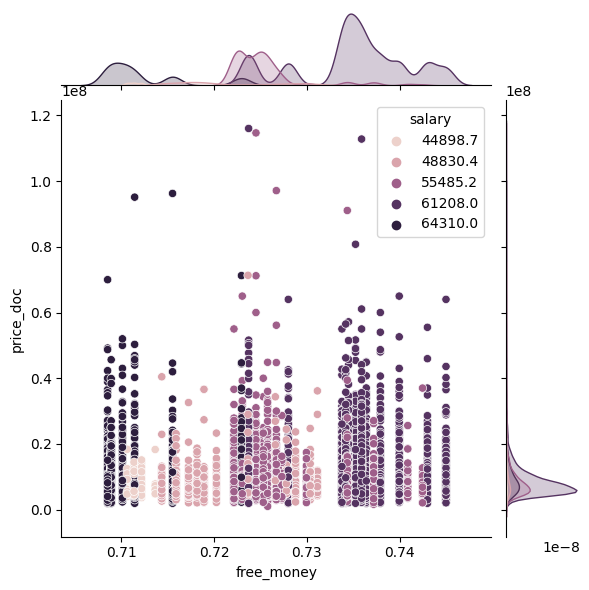

In [89]:
sns.jointplot(x="free_money", y="price_doc", data=df_full, hue='salary')
# Окончательное подтверждение, что доля свободных денег и размер зарплаты на цену квартиры не влияют =)

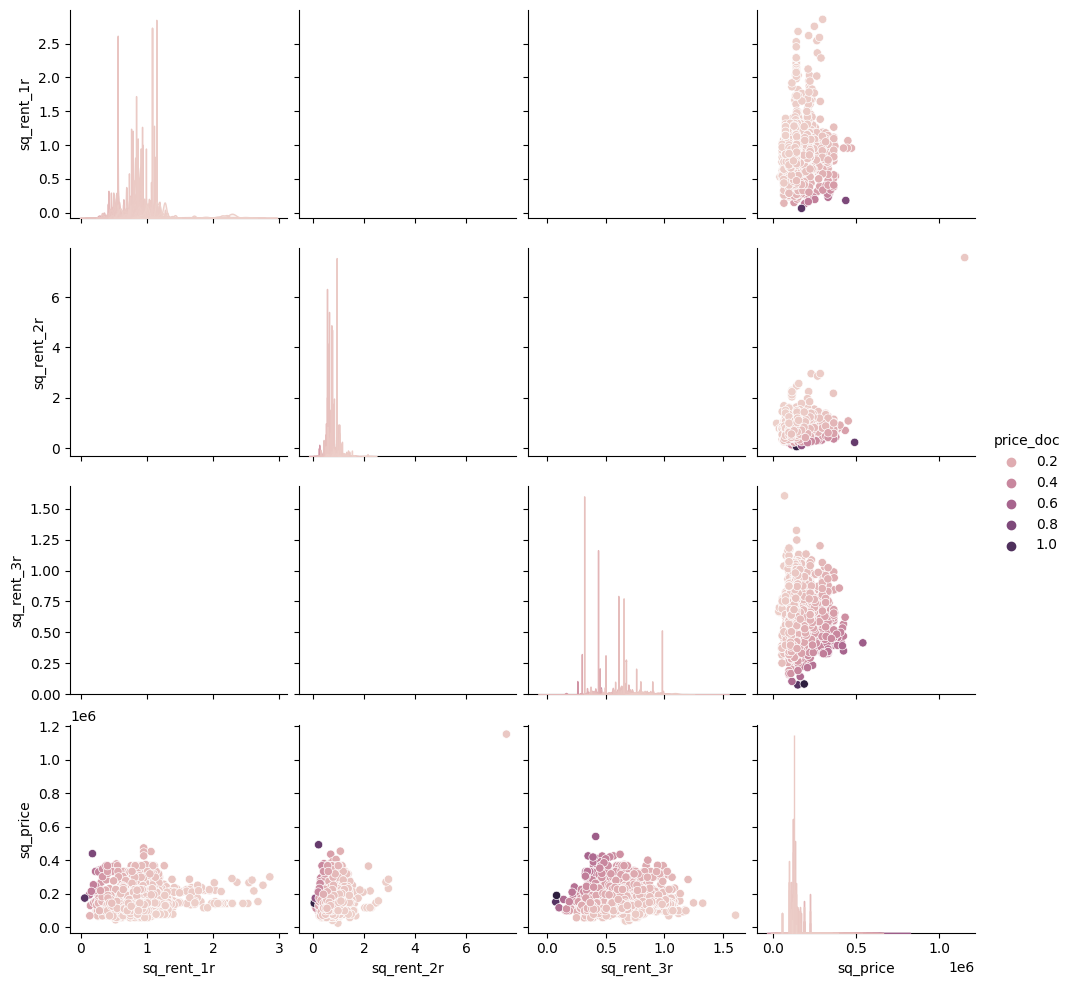

In [92]:
dt = df_full[['sq_rent_1r','sq_rent_2r','sq_rent_3r','sq_price','price_doc']]
sns.pairplot(data=dt, hue='price_doc')
# Между стоимостью аренды и стоимостью покупки метра значимых зависимостей не прослеживается
# Однако, любопытно, что чем ниже стоимость аренды, тем выше цена квартиры...

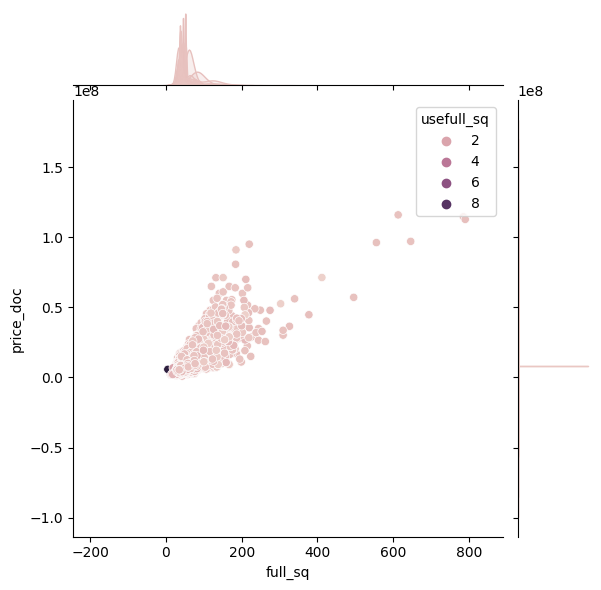

In [94]:
sns.jointplot(x="full_sq", y="price_doc", data=df_full, hue='usefull_sq')
# Полная площадь влияет на стоимость квартиры, в доле полезной площади, скорее всего, случился выброс, исказивший всю расскраску